###  Indian Premier League(IPL) Analysis
<img src='IPL.jpg'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
match_data = pd.read_csv("F:\DataSet\ipldata\matches.csv")

** Dataset of IPL between 2008 to 2019 matchbymatch **

In [3]:
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,04/05/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,04/06/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,04/07/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,04/08/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,04/08/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


** How many null value are their in each column **

In [4]:
match_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

** Drop the umpire3 column which is contains highest null values and we will not use that column in our dataset **

In [5]:
match_data.drop(columns='umpire3', axis=1).head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,04/05/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,04/06/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,04/07/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,04/08/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,04/08/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


** Number of matches played in each season **

Text(0.5, 1.0, 'Number of matches played in each season')

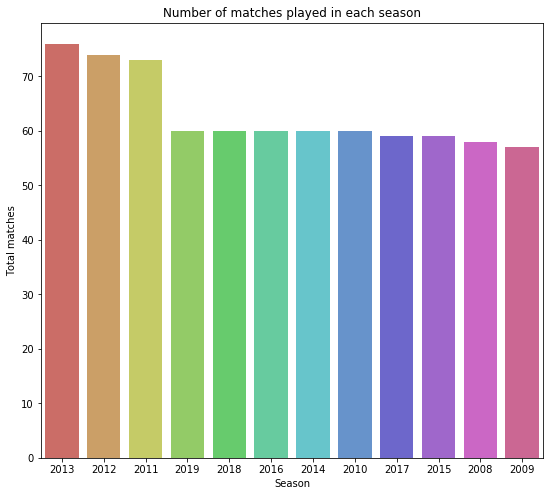

In [6]:
#match_data['season'].value_counts(ascending=False).sort_index()
plt.figure(figsize=(9,8))
sns.countplot(x='season', data=match_data, order=match_data['season'].value_counts().index, palette='hls')
plt.xlabel('Season')
plt.ylabel('Total matches')
plt.title('Number of matches played in each season')

** Matche won by the team **

Text(0.5, 1.0, 'Matches won by team')

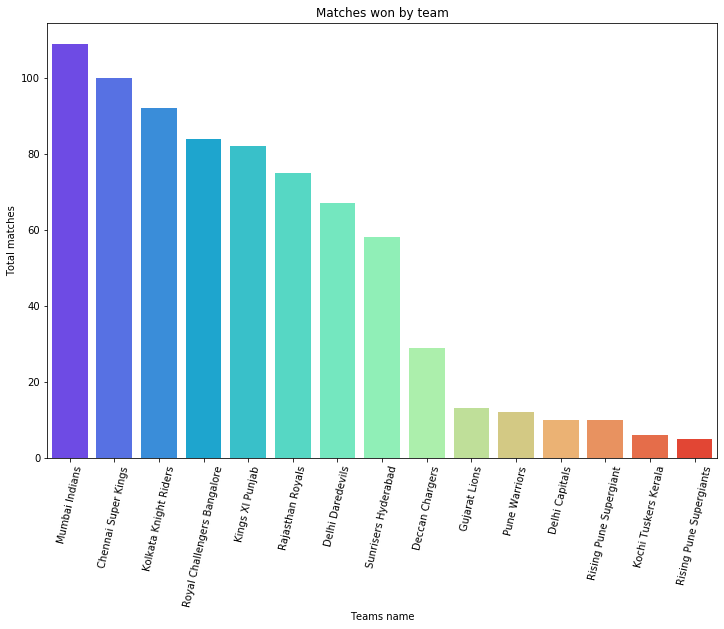

In [7]:
#match_data.groupby('winner')['team1'].count().sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x=match_data['winner'].value_counts().index, y=match_data['winner'].value_counts().values, palette='rainbow')
plt.xticks(rotation=77)
plt.xlabel('Teams name')
plt.ylabel('Total matches')
plt.title('Matches won by team')

** Venue **

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text xticklabel objects>)

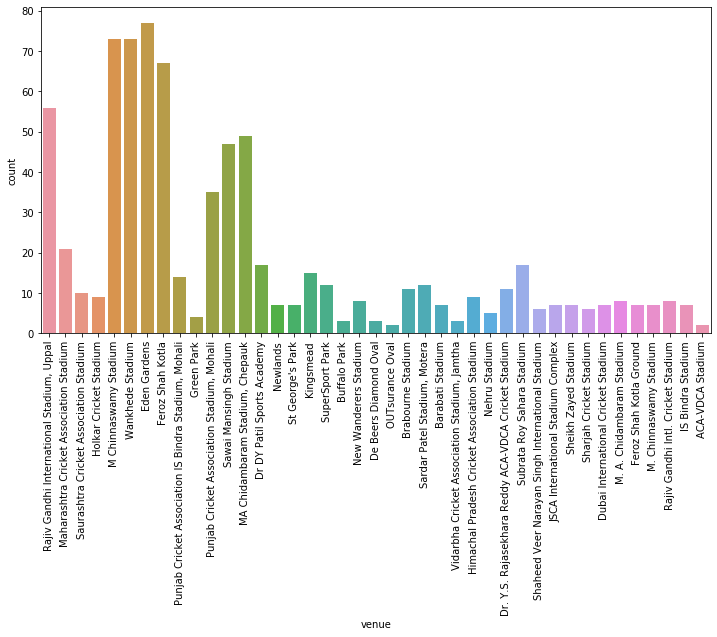

In [162]:
plt.figure(figsize=(12,6))
sns.countplot(x=match_data['venue'])
plt.xticks(rotation='vertical')

** IPL Winner & Opposite team **

In [8]:
final_matches = match_data.drop_duplicates(subset=['season'],keep='last')
final_matches[['season','winner','team1','team2']].reset_index(drop=True).sort_values(by='season')

,season,winner,team1,team2
1,2008,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals
2,2009,Deccan Chargers,Deccan Chargers,Royal Challengers Bangalore
3,2010,Chennai Super Kings,Chennai Super Kings,Mumbai Indians
4,2011,Chennai Super Kings,Chennai Super Kings,Royal Challengers Bangalore
5,2012,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders
6,2013,Mumbai Indians,Mumbai Indians,Chennai Super Kings
7,2014,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders
8,2015,Mumbai Indians,Mumbai Indians,Chennai Super Kings
9,2016,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore
0,2017,Mumbai Indians,Mumbai Indians,Rising Pune Supergiant


** IPL Finals venues and winner along with number of wins **

In [9]:
final_matches_with_city = match_data.drop_duplicates(subset='season', keep='last')
final_matches_with_city.groupby(['winner','city'])['winner'].count()

winner                 city        
Chennai Super Kings    Chennai         1
                       Mumbai          2
Deccan Chargers        Johannesburg    1
Kolkata Knight Riders  Bangalore       1
                       Chennai         1
Mumbai Indians         Hyderabad       2
                       Kolkata         2
Rajasthan Royals       Mumbai          1
Sunrisers Hyderabad    Bangalore       1
Name: winner, dtype: int64

** Find How many time each team win IPL Title **

Text(0.5, 1.0, 'Winning IPL Title')

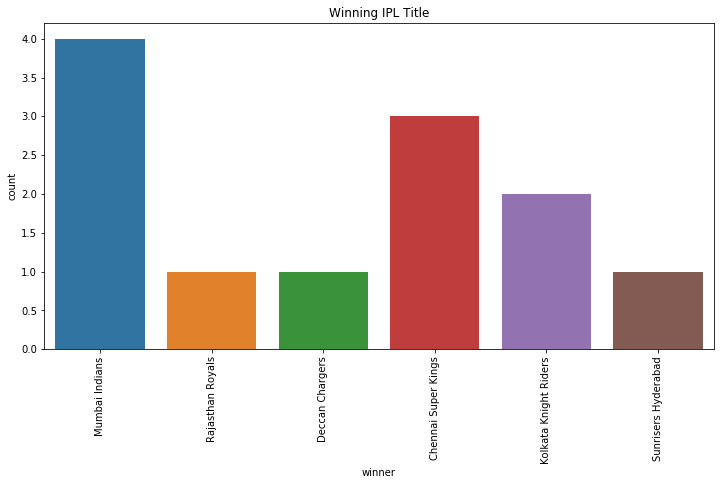

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x=final_matches['winner'])
plt.xticks(rotation='vertical')
plt.title("Winning IPL Title")

** Win Percentage **

In [11]:
# match = final_matches.winner.value_counts()
total_toss_in_final = final_matches.winner.count()
toss_win_bat = final_matches[final_matches['toss_decision'] == 'bat']['result'].count()
toss_win_bowl = final_matches[final_matches['toss_decision'] == 'field']['result'].count()
win_bat_percentage = (toss_win_bat / total_toss_in_final)*100
win_bowl_percentage = (toss_win_bowl / total_toss_in_final)*100
print("Choose batting {} times and percentage of wininng is {}".format(toss_win_bat, win_bat_percentage))
print("Choose bowling {} times and percentage of wininng is {}".format(toss_win_bowl, win_bowl_percentage))

# temp_series = final_matches.toss_decision.value_counts()
# labels = (np.array(temp_series.index))
# sizes = (np.array((temp_series / temp_series.sum())*100))
# colors = ['gold', 'lightskyblue']
# plt.pie(sizes, labels=labels, colors=colors,
#         autopct='%1.1f%%', shadow=True, startangle=90)
# plt.title("Toss decision percentage")

Choose batting 7 times and percentage of wininng is 58.333333333333336
Choose bowling 5 times and percentage of wininng is 41.66666666666667


Text(0.5, 1.0, 'Impact of toss across the season')

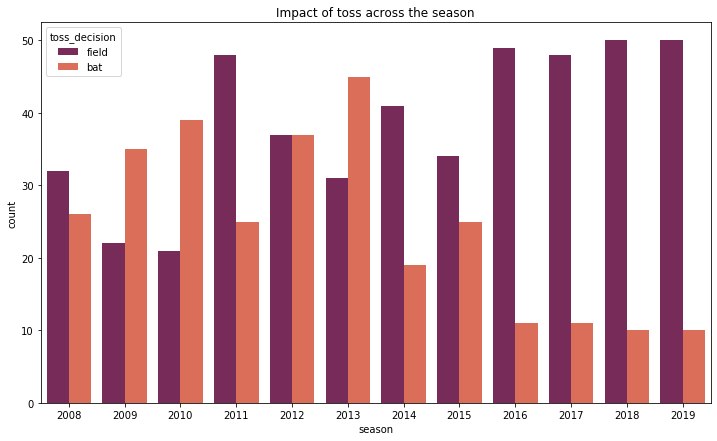

In [33]:
plt.figure(figsize=(12,7))
sns.countplot(x='season', hue='toss_decision',data=match_data, palette='rocket')
plt.title("Impact of toss across the season")

** Toss Decision in final and Impact of toss **

In [13]:
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


** MOM in Final **

<BarContainer object of 12 artists>

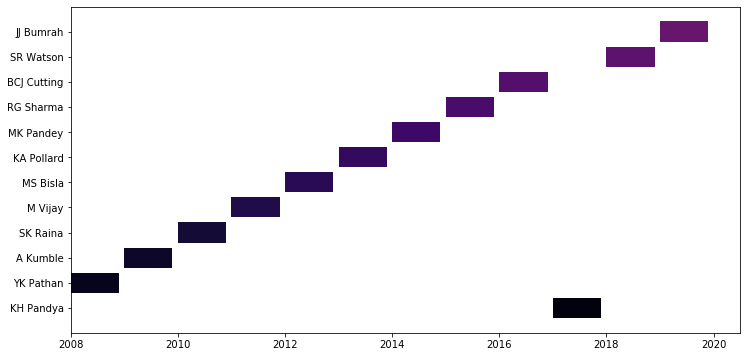

In [14]:
#final_matches[['winner','player_of_match','season']].reset_index(drop=True).sort_values(by='season')
plt.figure(figsize=(12,6))
plt.barh(y=final_matches['player_of_match'], width=.9, left=final_matches['season'], color=sns.color_palette('inferno',40))

** Dataset of IPL between 2008 to 2019 deliverywise **

In [15]:
delivery_data = pd.read_csv("F:\DataSet\ipldata\deliveries.csv")

In [16]:
delivery_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


** Total Four runs **

Text(0.5, 1.0, 'Total four runs by teams')

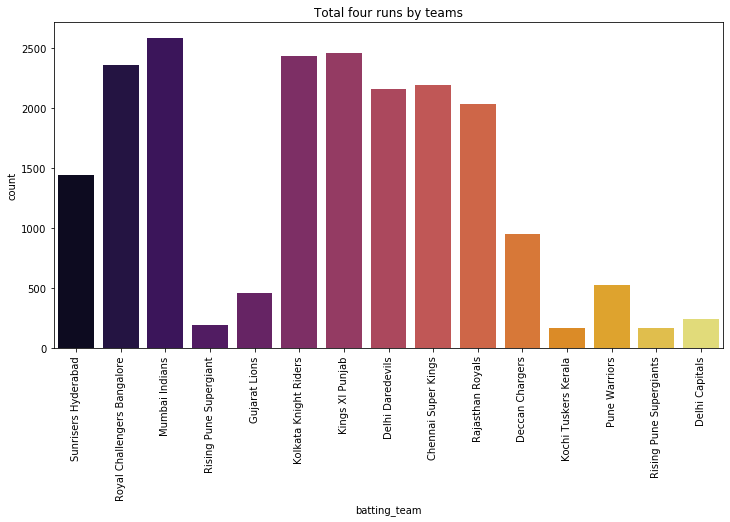

In [34]:
four_runs = delivery_data[delivery_data['batsman_runs'] == 4]
four_runs.groupby('batting_team', as_index=False)['batsman_runs'].agg({"Total runs by fours":"sum", "Total fours":"count"})


plt.figure(figsize=(12,6))
sns.countplot(x=four_runs['batting_team'], palette='inferno')
plt.xticks(rotation='vertical')
plt.title("Total four runs by teams")

** Merge Id, Season, Winner in deliverywise dataset to get season wise highest runs scorer **

In [19]:
season_data=match_data[['id','season','winner']]
complete_data = delivery_data.merge(season_data,how='inner',left_on='match_id',right_on='id')
complete_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,0,4,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,2,2,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad


** Total number of sixes each season **

In [20]:
complete_data[complete_data['batsman_runs'] == 6].groupby('season',as_index=False)['batsman_runs'].agg({'Sixes':'count'})

,season,Sixes
0,2008,623
1,2009,508
2,2010,587
3,2011,639
4,2012,733
5,2013,681
6,2014,715
7,2015,692
8,2016,639
9,2017,706


** TOP 10 Leading runs scorer in IPL **

In [21]:
total_runs = delivery_data.groupby('batsman')['total_runs'].sum()
extra_runs = delivery_data.groupby('batsman')['extra_runs'].sum()
legbye_runs = delivery_data.groupby('batsman')['legbye_runs'].sum()
wide_runs = delivery_data.groupby('batsman')['wide_runs'].sum()
final_total_runs = total_runs - extra_runs - legbye_runs - wide_runs
# final_total_runs.rename_axis
final_total_runs.sort_values(ascending=False)[:10]


batsman
V Kohli           5271
SK Raina          5202
RG Sharma         4786
DA Warner         4551
S Dhawan          4412
AB de Villiers    4300
MS Dhoni          4300
CH Gayle          4289
RV Uthappa        4215
G Gambhir         3982
dtype: int64

** Matches played by each player in IPL between 2008 to 2019 **

In [22]:
number_of_matches = delivery_data[['match_id','player_dismissed']]
number_of_matches = number_of_matches.groupby('player_dismissed')['match_id'].count().reset_index().sort_values(by='match_id', ascending=False)[:10].reset_index(drop=True)
number_of_matches.columns = ['batsman','total_matches']
number_of_matches

,batsman,total_matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137
5,G Gambhir,136
6,KD Karthik,135
7,PA Patel,126
8,AM Rahane,116
9,AT Rayudu,115


In [23]:
delivery_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


** Highest wicket taker bowler **

Text(0.5, 1.0, 'Highest wicket taker bowler')

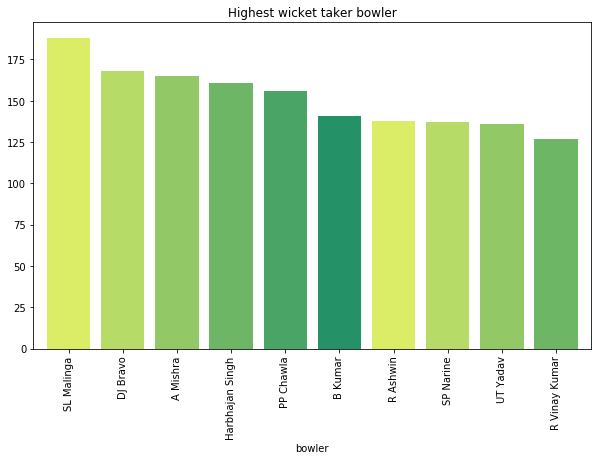

In [37]:
plt.figure(figsize=(10,6))
highest_wicket_taker = delivery_data.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10)
highest_wicket_taker.plot.bar(width=0.8, color=sns.color_palette('summer_r'))
plt.title("Highest wicket taker bowler")

** Total over deliverd by bowler **

In [39]:
eco = delivery_data.groupby('bowler').sum()
eco['total_balls'] = delivery_data['bowler'].value_counts()
eco['over'] = eco['total_balls']//6
eco[eco['over'] > 200].sort_values(by='over', ascending=False)['over'].head().reset_index()

,bowler,over
0,Harbhajan Singh,575
1,A Mishra,528
2,PP Chawla,526
3,R Ashwin,502
4,SL Malinga,495


** Best economy bowler **

In [41]:
eco['economy'] = eco['total_runs'] / eco['over']
eco[eco['over'] > 200].sort_values(by='economy')['economy'][:11].reset_index().T

,0,1,2,3,4,5,6,7,8,9,10
bowler,DW Steyn,M Muralitharan,R Ashwin,SP Narine,Harbhajan Singh,SL Malinga,SK Warne,B Kumar,A Mishra,PP Ojha,Shakib Al Hasan
economy,6.68665,6.71103,6.75498,6.78753,7.04348,7.09293,7.21675,7.23725,7.29167,7.40432,7.45575


** Extra runs given by bowler **

Text(0.5, 1.0, 'Extra runs given by bowler')

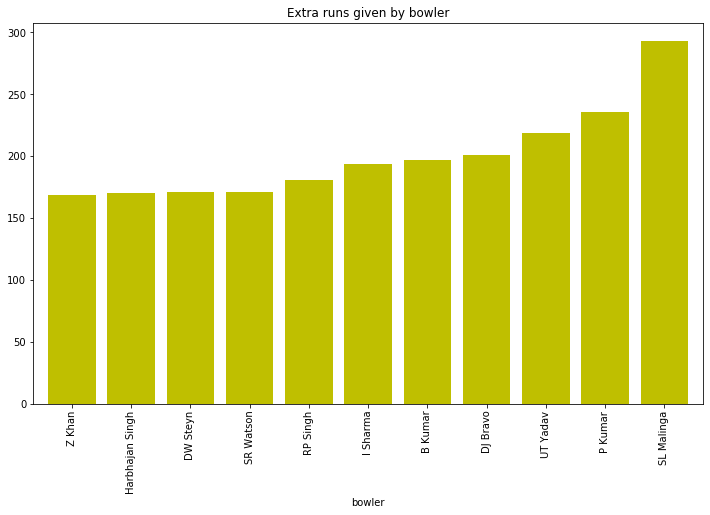

In [43]:
plt.figure(figsize=(12,7))
eco[eco['extra_runs'] > 100].sort_values(by='extra_runs')['extra_runs'].tail(11).plot.bar(width=0.8, color='y')
plt.title("Extra runs given by bowler")

** Number of dot balls bowled in IPL **

Text(0.5, 1.0, 'Number of dot balls bowled in IPL')

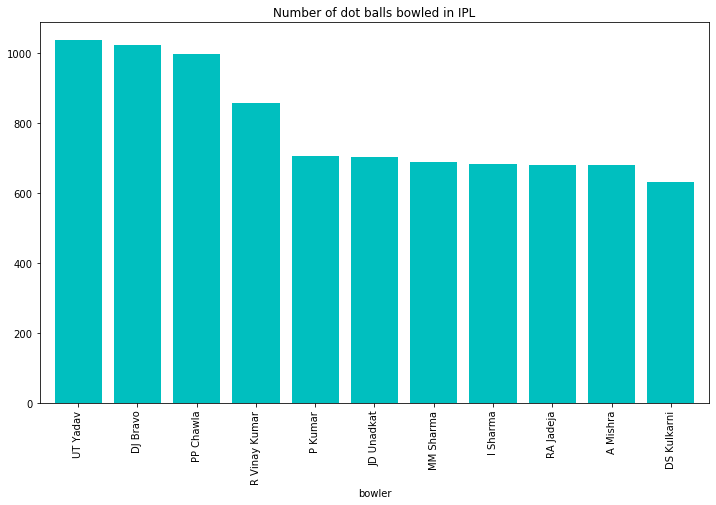

In [45]:
plt.figure(figsize=(12,7))
eco['dot_ball'] = eco['total_runs'] - eco['total_balls'] 
eco[eco['dot_ball'] > 500].sort_values(by='dot_ball', ascending=False)['dot_ball'][:11].plot.bar(width=0.8, color='c')
plt.title("Number of dot balls bowled in IPL")

** dismissal Kind **

Text(0.5, 1.0, 'dismissal Kind')

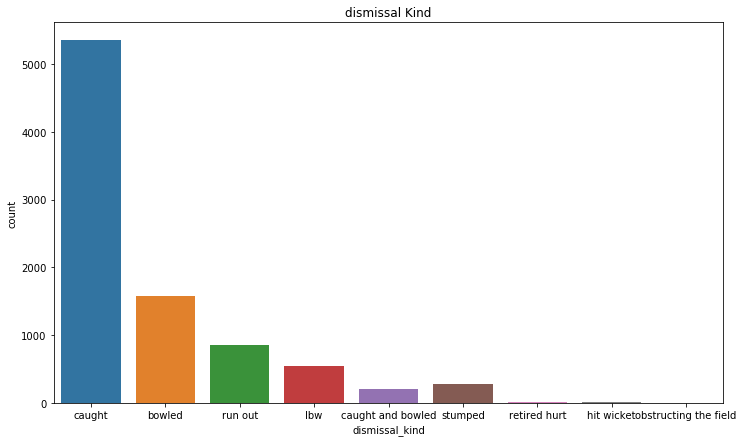

In [61]:
plt.figure(figsize=(12,7))
sns.countplot(x='dismissal_kind', data=delivery_data)
plt.title("dismissal Kind")

** Batsman with most number of sixes **

Text(0.5, 1.0, 'Batsman with most number of sixes')

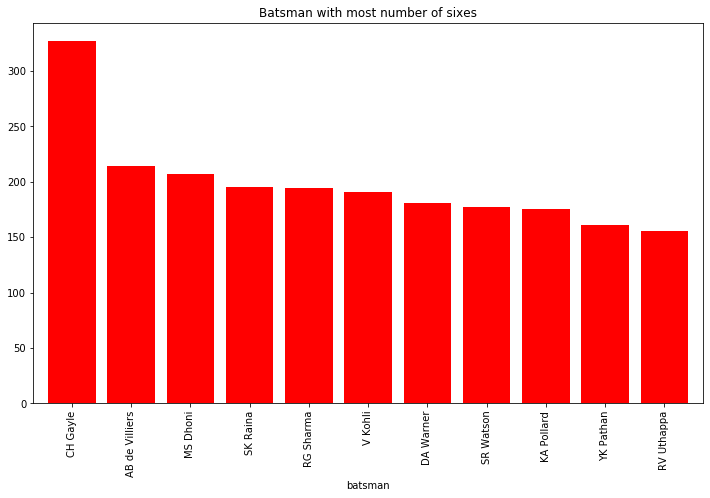

In [51]:
plt.figure(figsize=(12,7))
batsman = delivery_data[delivery_data['batsman_runs'] == 6]
sixes = batsman.groupby('batsman').sum()//6
sixes.sort_values(by='batsman_runs', ascending=False)['batsman_runs'][:11].plot.bar(width=0.8, color='r')
plt.title("Batsman with most number of sixes")

** Batsman with most number of fours **

Text(0.5, 1.0, 'Batsman with most number of fours')

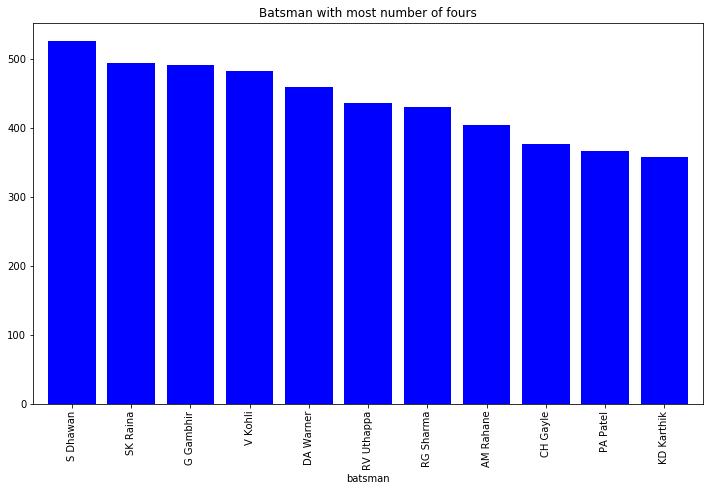

In [53]:
plt.figure(figsize=(12,7))
bts_four = delivery_data[delivery_data['batsman_runs'] == 4]
fours = bts_four.groupby(by='batsman').sum()//4
fours.sort_values(by='batsman_runs', ascending=False)['batsman_runs'][:11].plot.bar(width=0.8, color='b')
plt.title("Batsman with most number of fours")

** Number of dot ball played by batsman **

Text(0.5, 1.0, 'Number of dot ball played by batsman')

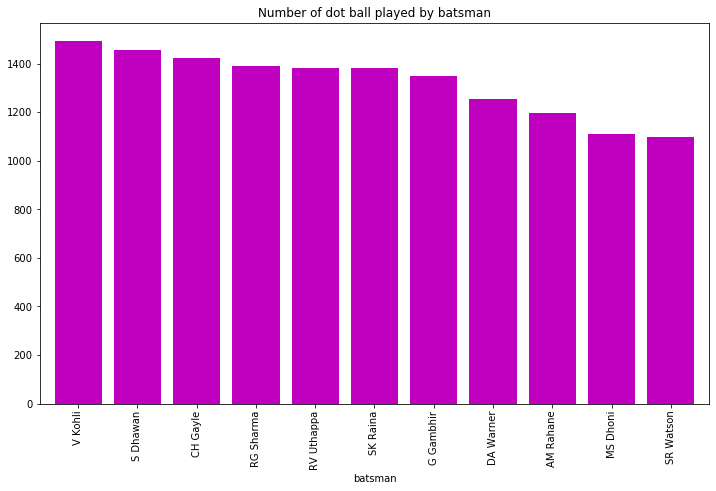

In [111]:
plt.figure(figsize=(12,7))
dots = delivery_data.groupby('batsman')['batsman_runs'].agg(lambda batsman_runs : (batsman_runs == 0).sum()).sort_values(ascending=False)[:11]
dots.plot.bar(width=0.8, color='m')
plt.title("Number of dot ball played by batsman")